In [0]:
# Importing Required libraries
import numpy as np # numpy for array manipulation
import random as rd # random to generete random numbers
from sklearn.datasets import load_iris # load_iris to load iris dataset

In [0]:
X,y = load_iris(return_X_y=True) # Loading boston dataset

In [0]:
#Hyperparameter
n_iter = 100 # Fix number of iteration
K = 3 # No. of clusters we want to create

In [0]:
m = X.shape[0] # No. of training Examples
n = X.shape[1] # No. of Features Examples

In [0]:
Centroids=np.array([]).reshape(n,0) # Initiallizing centriod for each feature

In [7]:
for i in range(K): # Logic for selecting centroid randomly intitally
    rand = rd.randint(0,m-1) # Any random number between 0 to m-1
    Centroids = np.c_[Centroids,X[rand]] # Adding odd centriod as a column in the new one
Centroids # Since we have 4 feature so our centriod is 4xk

array([[5.8, 6.7, 6.1],
       [2.7, 3. , 2.8],
       [5.1, 5. , 4.7],
       [1.9, 1.7, 1.2]])

In [0]:
output={} # Output dictionary
Distances = np.array([]).reshape(m,0) # Initiallizing array for euclidean distance

In [9]:
# In euclidean distance i am not using square root because effect remains the same in both the cases 
for k1 in range(K): 
    Distance_temp = np.sum((X-Centroids[:,k1])**2,axis=1) # Step by step using centriod and calculating difference sqaure for each example
    Distances = np.c_[Distances,Distance_temp] # Appending new column of distances in the calculated euclidean of the old one 
C = np.argmin(Distances,axis=1)+1 # Creating a index list which depicts which data sample belongs to which data sample
C

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1])

In [13]:
Y ={} # Initiallizing a output dictionary which is in the form of {centriod1 : all member corresponding to that cluster)
for k in range(K): # Creating four array as a value in the dictionary 
    Y[k+1] = np.array([]).reshape(4,0)
for i in range(m): # Appending all examples as per their corresponding centroids
    Y[C[i]]=np.c_[Y[C[i]],X[i]] 
for k in range(K): # Transposing the Y
    Y[k+1] = Y[k+1].T
for k in range(K): # Calculating new centriod which is median out of all member present inside that cluster
    Centroids[:,k] = np.median(Y[k+1],axis=0)


{1: array([[5.9, 3.2, 4.8, 1.8],
        [6. , 2.7, 5.1, 1.6],
        [6.3, 3.3, 6. , 2.5],
        [5.8, 2.7, 5.1, 1.9],
        [4.9, 2.5, 4.5, 1.7],
        [5.7, 2.5, 5. , 2. ],
        [5.8, 2.8, 5.1, 2.4],
        [6. , 2.2, 5. , 1.5],
        [5.6, 2.8, 4.9, 2. ],
        [6.2, 2.8, 4.8, 1.8],
        [6.1, 3. , 4.9, 1.8],
        [6.4, 2.8, 5.6, 2.2],
        [6.1, 2.6, 5.6, 1.4],
        [6. , 3. , 4.8, 1.8],
        [5.8, 2.7, 5.1, 1.9],
        [6.3, 2.5, 5. , 1.9],
        [6.2, 3.4, 5.4, 2.3],
        [5.9, 3. , 5.1, 1.8]]), 2: array([[7. , 3.2, 4.7, 1.4],
        [6.9, 3.1, 4.9, 1.5],
        [6.3, 3.3, 4.7, 1.6],
        [6.7, 3.1, 4.4, 1.4],
        [6.8, 2.8, 4.8, 1.4],
        [6.7, 3. , 5. , 1.7],
        [6.7, 3.1, 4.7, 1.5],
        [7.1, 3. , 5.9, 2.1],
        [6.3, 2.9, 5.6, 1.8],
        [6.5, 3. , 5.8, 2.2],
        [7.6, 3. , 6.6, 2.1],
        [7.3, 2.9, 6.3, 1.8],
        [6.7, 2.5, 5.8, 1.8],
        [7.2, 3.6, 6.1, 2.5],
        [6.5, 3.2, 5.1, 2. ],
   

In [1]:
# Repeat above explained process for n_iter number of times.
for f in range(n_iter):
    Distances = np.array([]).reshape(m,0)
    for k1 in range(K):
        Distance_temp = np.sum((X-Centroids[:,k1])**2,axis=1)
        Distances = np.c_[Distances,Distance_temp]
    C = np.argmin(Distances,axis=1)+1
    Y ={}
    for k in range(K):
        Y[k+1] = np.array([]).reshape(4,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]] 
    for k in range(K):
        Y[k+1] = Y[k+1].T
    for k in range(K):
        Centroids[:,k] = np.median(Y[k+1],axis=0)
    Output=Y
    

NameError: ignored

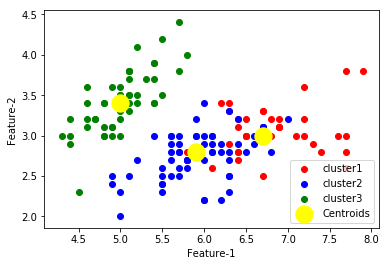

In [0]:
# ploting the Final Centriods and data samples To visualize in 2D i have plotted along first two feautre.
import matplotlib.pyplot as plt
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.legend()
plt.show()